<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/3/3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 最小２乗法を用いたクラス分類
- 目的
    - ロジスティック回帰を用いた分類の特性を学ぶ
- 内容
    - まずはノイズのないデータに対して分類を行う
    - 次に外れ値のあるデータに対して分類を行う

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

In [2]:
# Kをクラス数、Nをデータ数とする
K = 2
N = 100

## ノイズなしデータでの実験

In [3]:
# 訓練データを作成
cls1 = []
cls2 = []

# データは正規分布に従って生成
mean1 = [-1, 2]  # クラス1の平均
mean2 = [1, -1]  # クラス2の平均
cov = [[1.0,0.8], [0.8,1.0]]

# ノイズなしデータ
cls1.extend(np.random.multivariate_normal(mean1, cov, N//2))
cls2.extend(np.random.multivariate_normal(mean2, cov, N//2))

# データ行列Xを作成
X = vstack((cls1, cls2))

# 正解データを作成
y_0 = np.zeros(len(cls1))
y_1 = np.ones(len(cls2))
y = np.append(y_0, y_1)

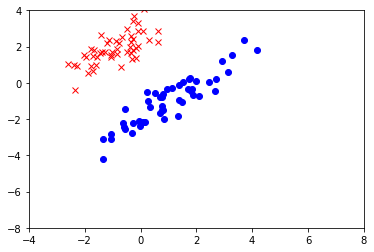

In [4]:
# 訓練データを表示
plot(np.array(cls1)[:,0], np.array(cls1)[:,1], 'rx')
plot(np.array(cls2)[:,0], np.array(cls2)[:,1], 'bo')
xlim(-4, 8)
ylim(-8, 4)
show()

In [5]:
# 訓練
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [6]:
print(lr.intercept_)
print(lr.coef_)
 
w_0 = lr.intercept_[0]
w_1 = lr.coef_[0,0]
w_2 = lr.coef_[0,1]
print(w_0, w_1, w_2)

[0.73130701]
[[ 1.73340746 -1.94183568]]
0.7313070149309531 1.7334074619234137 -1.9418356849545897


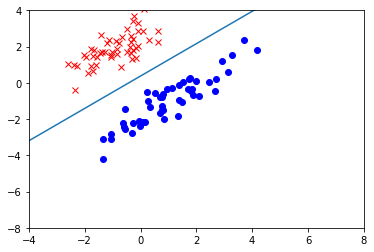

In [7]:
# 境界線 プロット
plt.plot([-4,8], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-4,8])))
 
# データを重ねる
plot(np.array(cls1)[:,0], np.array(cls1)[:,1], 'rx')
plot(np.array(cls2)[:,0], np.array(cls2)[:,1], 'bo')
xlim(-4, 8)
ylim(-8, 4)
show()

## ノイズありデータでの実験

In [8]:
# 訓練データを作成
cls1 = []
cls2 = []

mean1 = [-1, 2]  # クラス1の平均
mean2 = [1, -1]  # クラス2の平均
mean3 = [8, -6]  # クラス2のノイズデータの平均
cov = [[1.0,0.8], [0.8,1.0]] 

# ノイズありデータ
cls1.extend(np.random.multivariate_normal(mean1, cov, N//2))
cls2.extend(np.random.multivariate_normal(mean2, cov, N//2-20))
cls2.extend(np.random.multivariate_normal(mean3, cov, 20))  # 20個だけクラス2にノイズデータ追加

# データ行列Xを作成
X = vstack((cls1, cls2))

# 正解データを作成
y_0 = np.zeros(len(cls1))
y_1 = np.ones(len(cls2))
y = np.append(y_0, y_1)

In [9]:
# 訓練
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [10]:
print(lr.intercept_)
print(lr.coef_)
 
w_0 = lr.intercept_[0]
w_1 = lr.coef_[0,0]
w_2 = lr.coef_[0,1]
print(w_0, w_1, w_2)

[0.31760265]
[[ 1.64302144 -1.74054889]]
0.31760265467273024 1.6430214382943245 -1.740548886708607


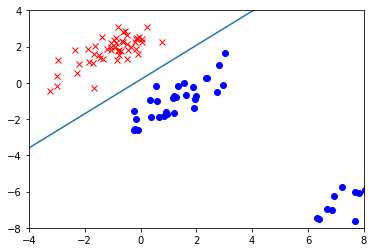

In [11]:
# 境界線 プロット
plt.plot([-4,8], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-4,8])))
 
# データを重ねる
plot(np.array(cls1)[:,0], np.array(cls1)[:,1], 'rx')
plot(np.array(cls2)[:,0], np.array(cls2)[:,1], 'bo')
xlim(-4, 8)
ylim(-8, 4)
show()